In [2]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [3]:
# IMPORT DATA
vehicles = pd.read_excel('databases/cleaned/vehicles_db.xlsx')

In [4]:
people = pd.read_excel('databases/cleaned/people_db.xlsx')

In [5]:
causes = pd.read_excel('databases/cleaned/cause_db.xlsx')

In [6]:
types = pd.read_excel('databases/cleaned/types_db.xlsx')

#### DATA INFORMATION:

The common information among the data sets is the following:

- Accident_ID
- Geographical: Codi_districte, Nom_districte, Codi_barri, Nom_barri, Codi_carrer, Nom_carrer, 
  Coordenada_UTM_X, Coordenada_UTM_Y
- Data, time: Any, Mes_any, Nom_mes, Dia_mes, Descripcio_dia_setmana, Hora_dia

The unique data to each data set is:
- Vehicles: Descripcio_causa_vianant, Descripcio_tipus_vehicle, Descripcio_model, Descripcio_marca, Descripcio_color,
  Descripcio_carnet, Antiguitat_carnet
- People: Descripcio_causa_vianant, Desc_Tipus_vehicle_implicat, Descripcio_sexe, Descripcio_tipus_persona,
  Descripcio_victimitzacio, Edat
- Types: Descripcio_tipus_accident
- Causes: Descripcio_causa_mediata

Data length:
- Vehicles: 166552 (unique accident_ID = 86630)
- People: 102783 (unique accident_ID = 79097)
- Types: 91584 (unique accident_ID = 86670)
- Causes: 86832 (unique accident_ID = 86665)

There seem to be around 86600 accidents in the database. The lower number in the people db might just indicate that some people was not registered?

In [19]:
vehicles['Codi_expedient'].nunique()

86630

#### QUESTIONS

Vehicle-related
- What kind of vehicle is associated with a higher rate of accidents?
- Are red vehicles more often involved in accidents?
- Are old vehicles more likely to suffer an accident?

Geographical/time related
- What neighborhoods have more accidents?
- What month/ day of the week / time of the day are you more likely to have an accident?
- Are there more accidents during a work day or during a weekend day?
- Are accidents equally distributed during the days of the week?
- Are accidents equally distributed during the months?

People-related
- At what age are you more likely to suffer an accident?
- Is there a correlation between license age and accidents?

Causes/types:
- What is the main cause of accidents?
- How likely are you to suffer an accident as a pedestrian?
- How likely are you to survive a car accident?
- Is rain correlated with a higher rate of accidents?
- Has the use of mobile phones increased the rate of accidents?


#### What neighborhoods have more accidents?

In [20]:
types.head()

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Dia_setmana,Descripcio_tipus_dia,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_tipus_accident,Coordenada_UTM_Y,Coordenada_UTM_X
0,2010S006909,10,Sant Martí,64,el Camp de l'Arpa del Clot,134801,Freser,0176 0176,Dilluns,Dl,Laboral,2010.0,10.0,Octubre,11.0,20.0,Tarda,Atropellament,"4585312,47","431736,08"
1,2010S006757,10,Sant Martí,64,el Camp de l'Arpa del Clot,226400,Las Navas de Tolosa,0329 0329,Dimarts,Dm,Laboral,2010.0,10.0,Octubre,5.0,16.0,Tarda,Col.lisió lateral,"4585527,16","431983,63"
2,2010S005591,10,Sant Martí,64,el Camp de l'Arpa del Clot,297001,Sant Antoni Maria Claret,0268 0268,Divendres,Dv,Laboral,2010.0,8.0,Agost,13.0,15.0,Tarda,Xoc contra element estàtic,"4585099,31","431268,10"
3,2010S008924,10,Sant Martí,64,el Camp de l'Arpa del Clot,161407,Indústria,0258 0258,Divendres,Dv,Laboral,2010.0,12.0,Desembre,24.0,14.0,Tarda,Col.lisió lateral,"4585137,05","431484,86"
4,2010S000187,10,Sant Martí,64,el Camp de l'Arpa del Clot,350308,València,0589 0589,Dissabte,Ds,Laboral,2010.0,1.0,Gener,9.0,14.0,Tarda,Abast,"4584685,43","431964,34"


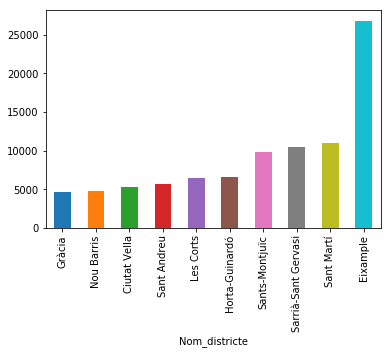

In [80]:
types[types['Nom_districte']!='Desconegut'].groupby('Nom_districte').count()['Numero_expedient'].sort_values().plot(kind='bar')

In [57]:
typ_yr_dist = types[types['Nom_districte']!='Desconegut'].groupby(['NK_Any','Nom_districte']).count()[['Numero_expedient']].reset_index()

In [58]:
typ_yr_dist.head()

,NK_Any,Nom_districte,Numero_expedient
0,2010.0,Ciutat Vella,510
1,2010.0,Eixample,2609
2,2010.0,Gràcia,536
3,2010.0,Horta-Guinardó,796
4,2010.0,Les Corts,693


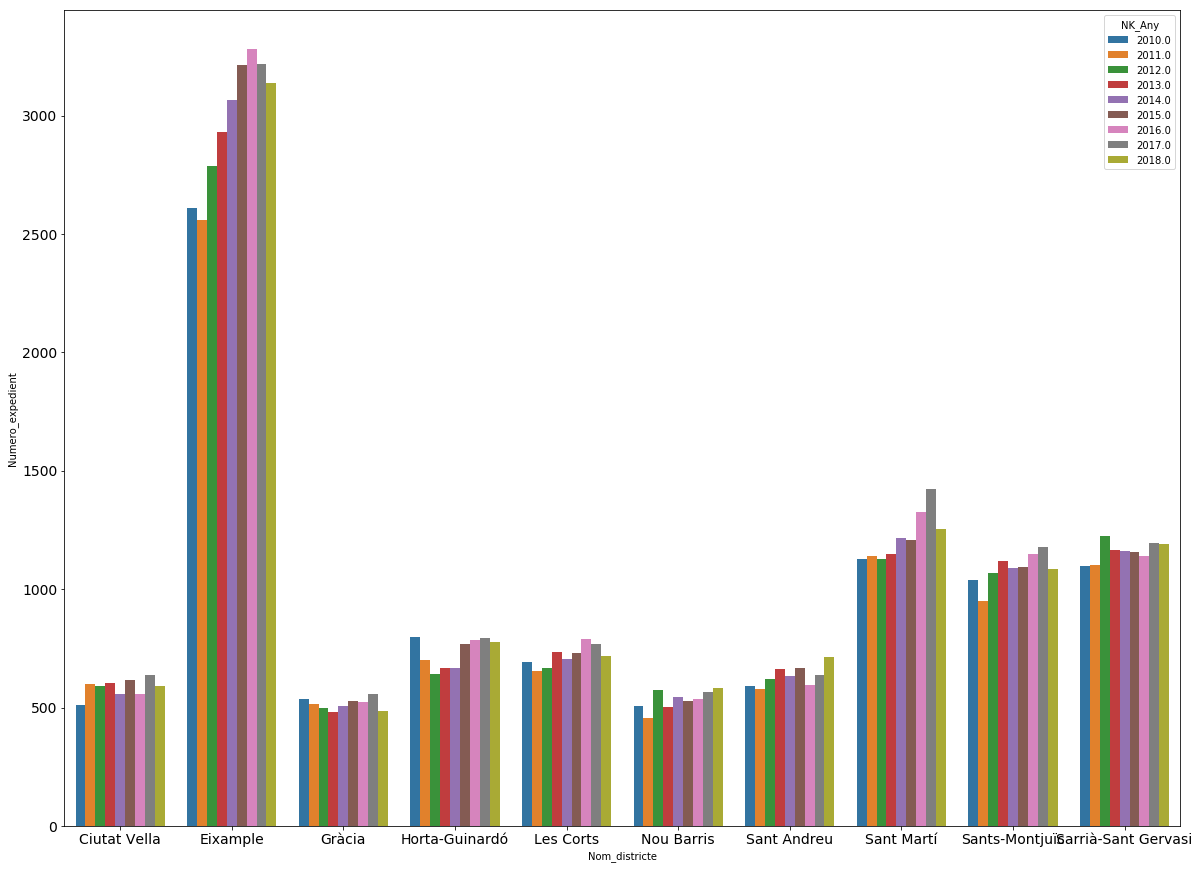

In [78]:
plt.figure(figsize=(20,15))
plt.tick_params(labelsize=14)
sns.barplot(x='Nom_districte',y='Numero_expedient',data=typ_yr_dist,hue='NK_Any')
plt.show()

In [81]:
# Comments:

# l'Eixample is clearly the district in Barcelona where there are more traffic accidents
# In addition, it seems to be the district where the number has increased more.

In [115]:
typ_yr_dist_diffs = typ_yr_dist[typ_yr_dist['NK_Any']==2018][['Nom_districte','Numero_expedient']].reset_index()

In [119]:
typ_yr_dist_diffs.drop('index',axis=1,inplace=True)

In [120]:
typ_yr_dist_diffs.columns = ['Nom_districte','Count_2018']

In [121]:
typ_yr_dist_diffs['Count_2010'] = typ_yr_dist[typ_yr_dist['NK_Any']==2010]['Numero_expedient']

In [127]:
typ_yr_dist_diffs['Diff_value'] = (typ_yr_dist_diffs['Count_2018'] - typ_yr_dist_diffs['Count_2010'])

In [128]:
typ_yr_dist_diffs['Diff_percent'] = (typ_yr_dist_diffs['Count_2018'] - typ_yr_dist_diffs['Count_2010'])/typ_yr_dist_diffs['Count_2010']*100

In [129]:
typ_yr_dist_diffs

,Nom_districte,Count_2018,Count_2010,Diff,Diff_value,Diff_percent
0,Ciutat Vella,592,510,0.160784,82,16.078431
1,Eixample,3137,2609,0.202376,528,20.237639
2,Gràcia,485,536,-0.095149,-51,-9.514925
3,Horta-Guinardó,777,796,-0.023869,-19,-2.386935
4,Les Corts,716,693,0.033189,23,3.318903
5,Nou Barris,583,506,0.152174,77,15.217391
6,Sant Andreu,714,590,0.210169,124,21.016949
7,Sant Martí,1254,1126,0.113677,128,11.367673
8,Sants-Montjuïc,1087,1039,0.046198,48,4.619827
9,Sarrià-Sant Gervasi,1190,1096,0.085766,94,8.576642


In [130]:
# Comments:

# Total number of traffic accidents have increased l'Eixample, followed by Sant Andreu and Sant Marti.
# However, the change in percentage is similar between l'Eixample and Sant Andreu, followed by Ciutat Vell and Nou Barris.

In [132]:
# Other comments:

# There are a lot of important rows passing through l'Eixample (Av. Diagonal, Gran Via de les Corts Catalanes,
# Av. Paral·lel, Passeig de Gràcia), which could justify the higher number of vehicles.

# Need to compare this with the vehicle number passing through every main road.

# Also, could do a test of differences between 2018 and 2010 to check whether the increase is statistically significant.